In [1]:
import math
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

# Quadratic functions

Let $m,n$ be two integers.

Given a matrix $A$, of size $m\times n$ and a vector $b\in\mathbb{R}^m$, we consider
\begin{equation*}
f_{A,b} : x\in\mathbb{R}^n \to \frac{1}{2} \left|\left| Ax-b \right|\right|_2^2.
\end{equation*}

**Question 1:** Provide implementations for $f_{A,b}$ and its gradient.

In [2]:
def f_Ab(x, A, b):
  return 0.5 * np.linalg.norm(A @ x - b)**2

In [3]:
def grad_f_Ab(x, A, b):
  return A.T @ (A @ x - b)

**Question 2:** Using a finite difference approximation, check that your implementation of the gradient is correct.

In [4]:
# Using a finite difference approximation, compute the gradient of f_Ab at x
def grad_f_Ab_finite_diff(x, A, b, h=1e-6):
  n = len(x)
  grad = np.zeros(n)
  for i in range(n):
    x_plus_h = x.copy()
    x_plus_h[i] += h
    grad[i] = (f_Ab(x_plus_h, A, b) - f_Ab(x, A, b)) / h
  return grad

In [5]:
# Make a little test case
m = 10
n = 5
A = random.randn(m, n)
b = random.randn(m)
x = random.randn(n)

# Check gradient implementation
print(grad_f_Ab_finite_diff(x, A, b))
print(grad_f_Ab(x, A, b))
assert np.allclose(grad_f_Ab_finite_diff(x, A, b), grad_f_Ab(x, A, b))

[17.66463975 -3.61096703  9.35819402  1.20363819 -7.208353  ]
[17.66463073 -3.61097756  9.35819121  1.20363437 -7.20835755]


**Question 3:** Implement a function $\verb+gradient_descent+(A,b,T,\mbox{step})$ which runs gradient descent on $f_{A,b}$, starting at point $x_0=0$, for $T$ steps, with constant stepsize step.

In [6]:
# Gradient descent on f_Ab starting at x0=0, for T steps, with constant stepsize step
def gradient_descent(A, b, x0, T=100, lr=0.1):
  n = len(x0)
  x = np.zeros((T+1, n))
  obj = np.zeros(T+1)
  x[0] = x0
  obj[0] = f_Ab(x[0], A, b)

  for t in range(T):
    x[t+1] = x[t] - lr * grad_f_Ab(x[t], A, b)
    obj[t+1] = f_Ab(x[t], A, b)
  
  return x, obj

**Question 4:** Implement a function $\verb+test+(m,n,T)$ which
* generates a random $m\times n$ matrix $A$ and an $m\times 1$ vector $b$,
* computes $L,\mu$, the Lipschitz and strong convexity constants of $f_{A,b}$,

[Hint : the largest and smallest singular values of a matrix $M$ are respectively given by $\verb+np.linalg.norm(M,2)+$ and $\verb+np.linalg.norm(M,-2)+$.]
* computes analytically the minimum of $f_{A,b}$ and a miimizer $x_{opt}$,
* runs $T$ steps of gradient on $f_{A,b}$ and records the sequence of objective values, $\verb+obj+$,
* plots $\verb+obj+ - \min f_{A,b}$ (using log-scale for the $y$-axis),
* plots (on the same figure) the upper bound on the convergence rate for $L$-smooth functions,
\begin{equation*}
t \to \frac{2L ||x_0-x_{opt}||_2^2}{t+4},
\end{equation*}
* plots the upper bound on the convergence rate for $L$-smooth and $\mu$-strongly convex functions,
\begin{equation*}
t \to \frac{L ||x_0-x_{opt}||_2^2}{2}\left(1-\frac{\mu}{L}\right)^{2t}.
\end{equation*}

In [7]:
def test(m, n, T):
  # Generate a random matrix A of shape (m,n) and a random vector b of shape (m,)
  A = random.randn(m, n)
  b = random.randn(m)

  # Compute L, mu the Lipschitz constant and strong convexity parameter of f_Ab
  L = np.linalg.norm(A.T @ A, ord=2) # the largest singular value of A.T @ A
  mu = np.linalg.norm(A.T @ A, ord=-2) # the samallest singular value of A.T @ A

  # Compute analytically the minimizer of f_Ab and a minimizer x_opt
  x_opt = np.linalg.pinv(A) @ b # pesudo-inverse of A times b
  min_f_Ab = f_Ab(x_opt, A, b)

  # Runs T steps of gradient descent on f_Ab and records the sequence of objective values, obj
  x0 = np.zeros(n)
  x, obj = gradient_descent(A=A, b=b, x0=x0, T=T, lr=1/L) # stepsize = 1/L
  
  # Plots obj - min_f_Ab vs. iteration number
  plt.plot(obj - min_f_Ab, label='obj - min_f_Ab')
  plt.xlabel('t')
  plt.ylabel('obj - min_f_Ab')
  plt.yscale('log')
  plt.title('m={}, n={}, T={}'.format(m, n, T))
  

  # Plots (on the same figure) the upper bound on the convergence rate for L_smooth function
  upperbound_L = np.zeros(T+1)
  for t in range(T+1):
    upperbound_L[t] = (2 * L * np.linalg.norm(x0 - x_opt)**2) / (t + 4)
  plt.plot(upperbound_L, label='upperbound_L')

  # Plots the upper bound on the convergence rate for L-smooth and mu_strongly_convex function
  upperbound_L_mu = np.zeros(T+1)
  for t in range(T+1):
    upperbound_L_mu[t] = (1/2) * L * (np.linalg.norm(x0 - x_opt)**2) * (1 - (mu/L))**(2*t)
  plt.plot(upperbound_L_mu, label='upperbound_L_mu')

  plt.legend()
  plt.show()


**Question 5:** Run several times $\verb+test(40,20,100)+$ and $\verb+test(20,20,1000)+$. Check that the upper bounds are above $\verb+obj+-\min f_{A,b}$. [Note: if they don't, it means that there is an error in your code. Correct it!]

Comment the results.

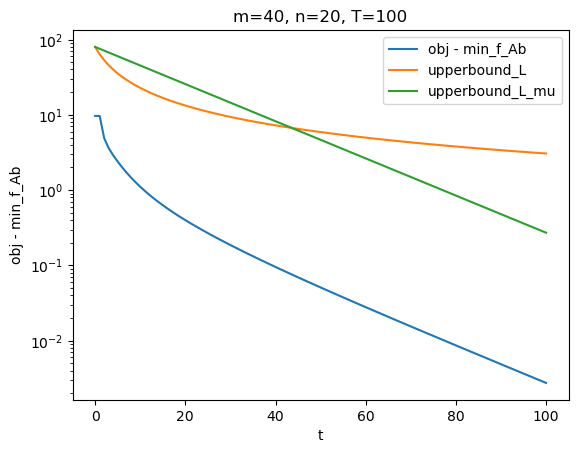

In [8]:
test(m=40, n=20, T=100)

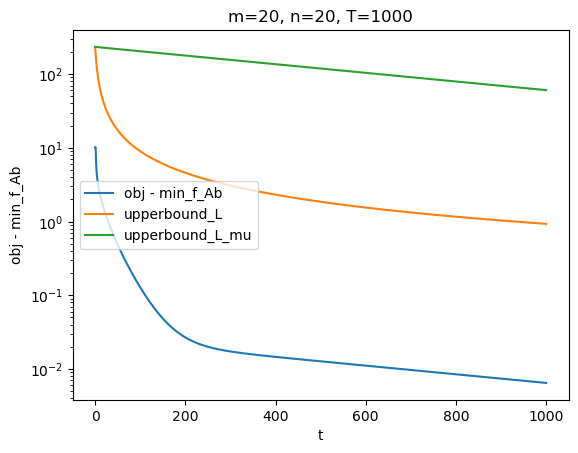

In [9]:
test(m=20, n=20, T=1000)

**Question 6:** For $m=10,n=5$, run gradient descent on random $A$ and $b$ using stepsizes $\frac{0.1}{L},\frac{1}{L},\frac{10}{L}$. What is the difference?

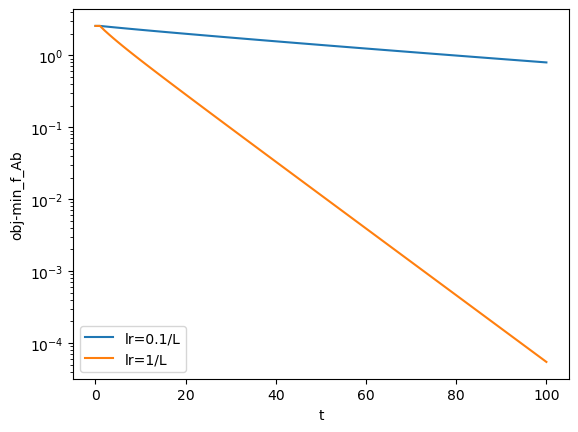

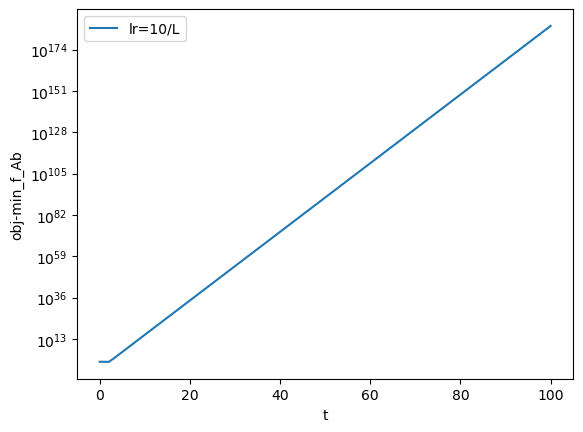

In [10]:
m = 10
n = 5
A = random.randn(m, n)
b = random.randn(m)
x0 = np.zeros(n)

# Compute L, mu the Lipschitz constant and strong convexity parameter of f_Ab
L = np.linalg.norm(A.T @ A, ord=2) # the largest singular value of A.T @ A

# Compute analytically the minimizer of f_Ab and a minimizer x_opt
x_opt = np.linalg.pinv(A) @ b # pesudo-inverse of A times b
min_f_Ab = f_Ab(x_opt, A, b)


# Run gradient descent on f_Ab with stepsize 0.1/L
x, obj = gradient_descent(A=A, b=b, x0=x0, T=100, lr=0.1/L)
plt.plot(obj - min_f_Ab, label='lr=0.1/L')
plt.xlabel('t')
plt.ylabel('obj-min_f_Ab')
plt.yscale('log')
plt.legend()


# Run gradient descent on f_Ab with stepsize 1/L
x, obj = gradient_descent(A=A, b=b, x0=x0, T=100, lr=1/L)
plt.plot(obj - min_f_Ab, label='lr=1/L')
plt.xlabel('t')
plt.ylabel('obj-min_f_Ab')
plt.yscale('log')
plt.legend()
plt.show()


# # Run gradient descent on f_Ab with stepsize 10/L
x, obj = gradient_descent(A=A, b=b, x0=x0, T=100, lr=10/L)
plt.plot(obj - min_f_Ab, label='lr=10/L')
plt.xlabel('t')
plt.ylabel('obj-min_f_Ab')
plt.yscale('log')
plt.legend()
plt.show()




**Question 7:** Implement a variant of your function $\verb+gradient_descent+$, where the stepsize is determined by backtracking linesearch. Use, for instance, a coefficient $0.3$ in the Armijo-Goldstein condition, and scale the step by $0.6$ at each iteration.

In [11]:
def gradient_descent_backtracking(A, b, x0, T=100, alpha=0.3, beta=0.6):
  n = len(x0)
  x = np.zeros((T+1, n))
  obj = np.zeros(T+1)
  x[0] = x0
  obj[0] = f_Ab(x[0], A, b)

  for t in range(T):
    grad = grad_f_Ab(x[t], A, b)
    step_size = 1.0  # Initial step size
    # Backtracking line search
    while f_Ab(x[t] - step_size * grad, A, b) > obj[t] - alpha * step_size * np.linalg.norm(grad)**2:
      step_size *= beta  # Backtrack the step size

    x[t+1] = x[t] - step_size * grad
    obj[t+1] = f_Ab(x[t+1], A, b)

  return x, obj

**Question 8:** For $m=10,n=5$, compare the function with backtracking to gradient descent with constant stepsize.

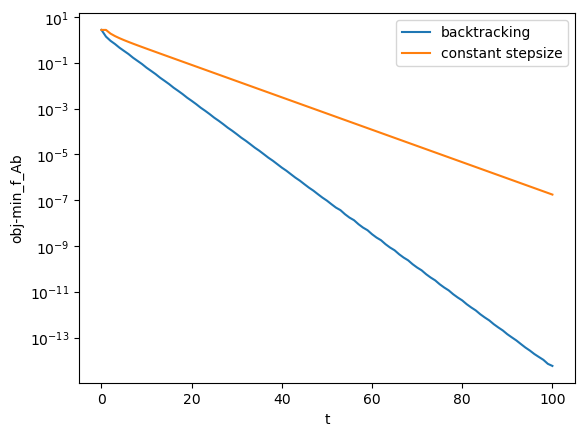

In [12]:
m = 10
n = 5
A = random.randn(m, n)
b = random.randn(m)
x0 = np.zeros(n)

# Compute L, mu the Lipschitz constant and strong convexity parameter of f_Ab
L = np.linalg.norm(A.T @ A, ord=2) # the largest singular value of A.T @ A

# Compute analytically the minimizer of f_Ab and a minimizer x_opt
x_opt = np.linalg.pinv(A) @ b # pesudo-inverse of A times b
min_f_Ab = f_Ab(x_opt, A, b)

# Run gradient descent with backtracking line search on f_Ab
x, obj = gradient_descent_backtracking(A=A, b=b, x0=x0, T=100, alpha=0.3, beta=0.6)
plt.plot(obj - min_f_Ab, label='backtracking')

# Run gradient descent with constant stepsize on f_Ab with stepsize 1/L
x, obj = gradient_descent(A=A, b=b, x0=x0, T=100, lr=1/L)
plt.plot(obj - min_f_Ab, label='constant stepsize')

plt.xlabel('t')
plt.ylabel('obj-min_f_Ab')
plt.yscale('log')
plt.legend()
plt.show()
